In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [65]:
dataset=pd.read_csv('/Users/macbook/Documents/python/outtot0.001.csv', delimiter=',', header=None)



In [66]:
dataset.columns=['time','zm1', 'zm2', 'zm3', 'zmee', 'zme', 'Dmsol', 'Dmatm', 'th12','th13', 'th23', 'phi1', 'phi2','del']

In [67]:
dataset['time'] = dataset['time'].str.replace('{',' ')
dataset['del'] = dataset['del'].str.replace('}',' ')

In [69]:
dataset= dataset.replace("'", "")

In [70]:
dataset= dataset.iloc[:,1:14]
# split into input (X) and output (Y) variables
#dataset=dataset.drop(['time', axis=1)



In [71]:
dataset.tail()

,zm1,zm2,zm3,zmee,zme,Dmsol,Dmatm,th12,th13,th23,phi1,phi2,del
11995,0.137278,0.137705,0.168306,0.136910,0.137279,0.000118,0.009364,2.60438,0.177267,0.416322,230.988,50.9867,68.9282
11996,0.137277,0.137704,0.168307,0.136909,0.137278,0.000118,0.009365,2.60438,0.177260,0.416301,230.990,50.9893,68.9278
11997,0.137276,0.137703,0.168307,0.136909,0.137277,0.000118,0.009365,2.60438,0.177254,0.416279,230.993,50.9920,68.9274
11998,0.137275,0.137702,0.168308,0.136908,0.137276,0.000118,0.009366,2.60438,0.177248,0.416258,230.995,50.9947,68.9271
11999,0.137274,0.137701,0.168309,0.136907,0.137275,0.000118,0.009366,2.60438,0.177242,0.416236,230.998,50.9973,68.9267


In [72]:
dataset.shape

(12000, 13)

In [73]:
dataset_train= dataset.iloc[0:11000,0:13]
dataset_test= dataset.iloc[11000:12000,0:13]

In [74]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
dataset_train_scaled=sc.fit_transform(dataset_train)
#print(dataset_train1_scaled[1:2,:])

In [75]:
X_train = []
Y_train = []
for i in range(60,dataset_train.shape[0]):
    X_train.append(dataset_train_scaled[i-60:i,0:13])
    Y_train.append(dataset_train_scaled[i,0:13])

In [76]:
X_train, Y_train=np.asarray(X_train).astype(np.float32), np.asarray(Y_train).astype(np.float32)

In [77]:
X_train.shape

(10940, 60, 13)

In [78]:
X_train=np.reshape(X_train,(X_train.shape[0],60,13))

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [175]:
regressor=Sequential()
regressor.add(LSTM(units=60,activation='selu', return_sequences=False,input_shape = (X_train.shape[1], 13))) 
regressor.add(Dropout(0.5))



regressor.add(Dense(units=13))

In [176]:
regressor.compile(optimizer = 'nAdam', loss = 'mean_squared_error', metrics = ['mape', 'mae'])

In [177]:
from keras.callbacks import TensorBoard
TB = TensorBoard(histogram_freq=10)
history=regressor.fit(X_train, Y_train, batch_size = 32, epochs = 50, validation_split=0.08,verbose = 1,callbacks=[TB])

Epoch 1/50
315/315 [==============================] - 14s 38ms/step - loss: 0.1121 - mape: 4603247.8900 - mae: 0.2430 - val_loss: 0.0027 - val_mape: 7445.7905 - val_mae: 0.0423
Epoch 2/50
315/315 [==============================] - 11s 35ms/step - loss: 0.0199 - mape: 1756970.9359 - mae: 0.1100 - val_loss: 0.0064 - val_mape: 2835.1155 - val_mae: 0.0697
Epoch 3/50
315/315 [==============================] - 11s 34ms/step - loss: 0.0121 - mape: 1432046.4061 - mae: 0.0851 - val_loss: 7.3682e-04 - val_mape: 1093.3821 - val_mae: 0.0196
Epoch 4/50
315/315 [==============================] - 11s 35ms/step - loss: 0.0084 - mape: 1209218.1756 - mae: 0.0704 - val_loss: 0.0012 - val_mape: 5482.5093 - val_mae: 0.0264
Epoch 5/50
315/315 [==============================] - 12s 37ms/step - loss: 0.0064 - mape: 1116516.2346 - mae: 0.0612 - val_loss: 0.0015 - val_mape: 5994.0249 - val_mae: 0.0314
Epoch 6/50
315/315 [==============================] - 12s 37ms/step - loss: 0.0048 - mape: 1048779.4883 - mae: 

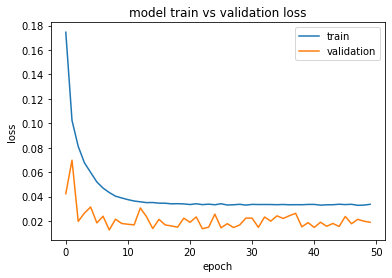

In [178]:
from matplotlib import pyplot

pyplot.plot(history.history['mae'])
pyplot.plot(history.history['val_mae'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [179]:
real_data = dataset_test.iloc[:, 0:13].values


In [180]:
real_data[1:2,:]

array([[0.138124, 0.13855, 0.16729000000000002, 0.137647, 0.138125,
        0.000117831, 0.00878998, 2.60433, 0.183898, 0.438906, 228.551,
        48.3289, ' 69.3293 ']], dtype=object)

In [181]:
total_data=pd.concat((dataset_train,dataset_test),axis=0).reset_index(drop=True)


In [182]:
inputs=total_data[len(total_data)-len(dataset_test)-60:].values

In [183]:
inputs = sc.transform(inputs)
inputs=pd.DataFrame(inputs)

inputs.shape

(1060, 13)

In [184]:

X_test=[]
Y_test=[]

for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs.iloc[i, 0:13])

In [185]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape


((1000, 60, 13), (1000, 13))

In [186]:
Y_pred = regressor.predict(X_test)
Y_pred

array([[ 1.0027397e+00,  1.0029970e+00,  9.9198306e-01, ...,
         9.3847030e-01,  9.4788301e-01,  2.2089481e-04],
       [ 1.0027487e+00,  1.0030062e+00,  9.9202865e-01, ...,
         9.3857026e-01,  9.4797766e-01,  1.4072657e-04],
       [ 1.0027559e+00,  1.0030136e+00,  9.9207342e-01, ...,
         9.3867058e-01,  9.4807255e-01,  6.0558319e-05],
       ...,
       [ 1.0039572e+00,  1.0043826e+00,  1.0305904e+00, ...,
         1.0327646e+00,  1.0365626e+00, -7.2931051e-02],
       [ 1.0039638e+00,  1.0043894e+00,  1.0306354e+00, ...,
         1.0328662e+00,  1.0366588e+00, -7.3012412e-02],
       [ 1.0039700e+00,  1.0043958e+00,  1.0306798e+00, ...,
         1.0329676e+00,  1.0367547e+00, -7.3093593e-02]], dtype=float32)

In [187]:
predicted_data=sc.inverse_transform(Y_pred)

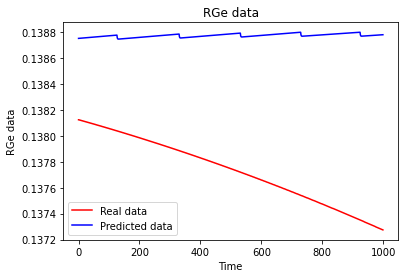

0 zm1


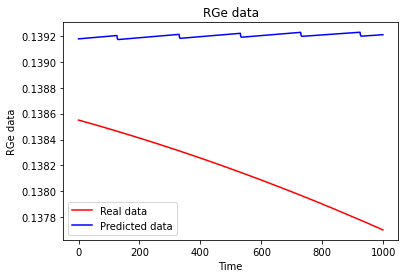

1 zm2


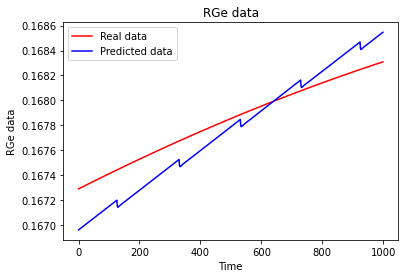

2 zm3


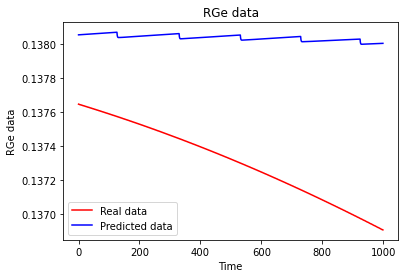

3 zmee


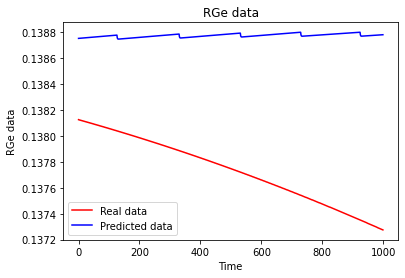

4 zme


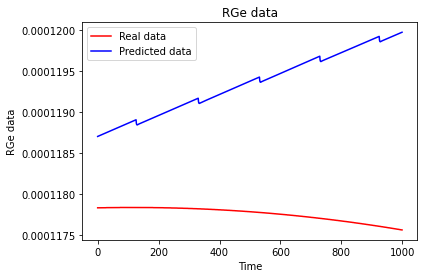

5 Dmsol


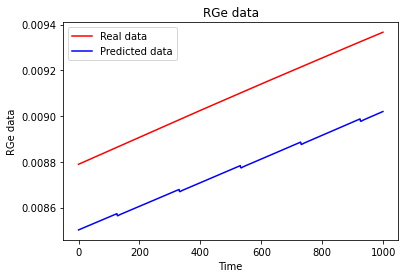

6 Dmatm


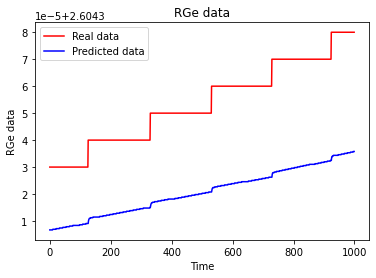

7 th12


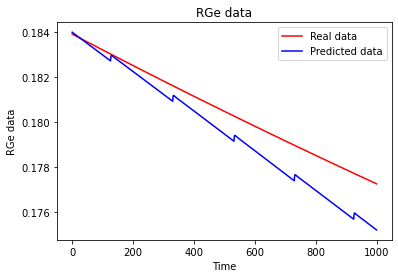

8 th13


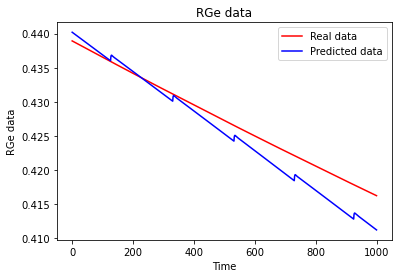

9 th23


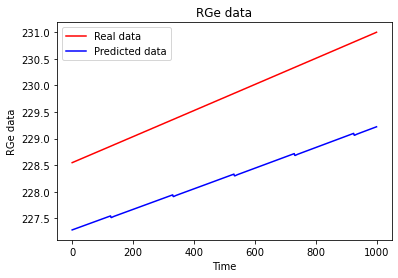

10 phi1


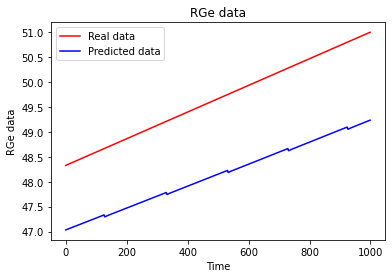

11 phi2


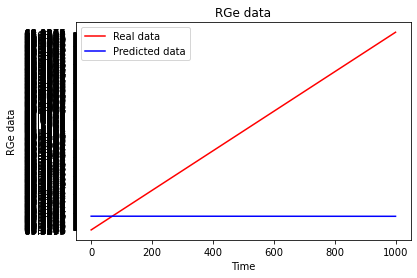

12 del


In [188]:
for i in range(13):
    plt.plot(real_data[:,i], color='red',label='Real data')
    plt.plot(predicted_data[:,i], color='blue',label='Predicted data')
    plt.title('RGe data')
    plt.xlabel('Time')
    plt.ylabel('RGe data')
    plt.legend()
    plt.show()
    print(i,dataset.columns[i])